## Основные термины теории графов

Vertex - Вершина / Чаще в англ используется Node - узел

Edge - Ребро


Многие объекты, возникающие в жизни человека, могут быть смоделированы (представлены в памяти компьютера) при помощи графов. Например, транспортные схемы (схема метрополитена и т. д.) изображают в виде станций, соединенных линиями. В терминах графов станции называются вершинами графа а линии – ребра.

**Графом** называется конечное множество вершин и множество ребер. Каждому ребру сопоставлены две вершины – концы ребра.

Граф моделирует набор связей.

Бывают различные варианты определения графа. В данном определении концы у каждого ребра – равноправны. В этом случае нет разницы где начало, а где – конец у ребра. Но, например, в транспортных сетях бывают случаи одностороннего движения по ребру, тогда говорят об **ориентированном** графе – графе, у ребер которого одна вершина считается начальной, а другая – конечной.

Если некоторое ребро u соединяет две вершины A и B графа, то говорят, что ребро u **инцидентно** вершинам A и B, а вершины в свою очередь инцидентны ребру u. Вершины, соединенные ребром, называются **смежными**.

Ребра называются **кратными**, если они соединяют одну и ту же пару вершин (а в случае ориентированного графа – если у них совпадают начала и концы). Ребро называется **петлей**, если у него совпадают начало и конец. Во многих задачах кратные ребра и петли не представляют интереса, поэтому могут рассматриваться только графы без петель и кратных ребер. Такие графы называют **простыми**.

Степенью вершины в неориентированном графе называется число инцидентных данной вершине ребер (при этом петля считается два раза, то есть степень - это количество «концов» ребер, входящих в вершину). Довольно очевидно, что сумма степеней всех вершин равна удвоенному числу ребер в графе. Отсюда можно посчитать максимальное число ребер в простом графе - если у графа $n$ вершин, то степень каждой из них равна $n-1$, а, значит, число ребер есть $n(n-1)/2$. Граф, в котором любые две вершины соединены одним ребром, называется полным **графом**.

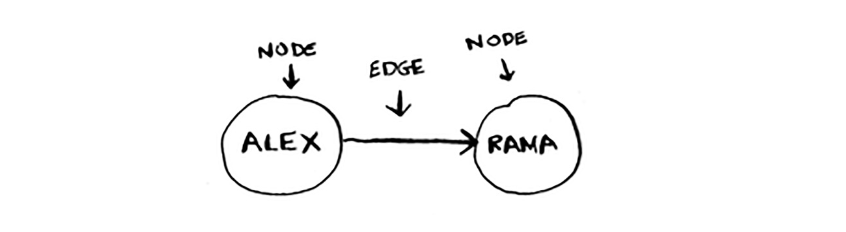

## Пути, циклы, компоненты связности

**Путем** на графе называется последовательность ребер $u_1, u_2, …, u_k$, в которой конец одного ребра является началом следующего ребра. Начало первого ребра называется началом пути, конец последнего ребра - концом пути. Если начало и конец пути совпадают, то такой путь называется **циклом**.
Путь, который проходит через каждую вершину не более одного раза называется простым путем. Аналогично определяется простой цикл.

Граф называется **связным**, если между любыми двумя его вершинами есть путь. Если граф несвязный, то его можно разбить на несколько частей (подграфов), каждая из которых будет связной. Такие части называются **компонентами связности**. Возможно, что некоторые компоненты связности будут состоять всего лишь из одной вершины.

Понятно, что в графе из $n$ вершин может быть от 1 до $n$ компонент связности.

## Деревья
Определение – **деревом** называется связный граф не содержащий простых циклов.

Можно показать, что эквивалентны следующие определения дерева:
1) Деревом называется связный граф не содержащий простых циклов.
2) Деревом называется связный граф, содержащий  вершин и  ребро.
3) Деревом называется связный граф, который при удалении любого ребра перестает быть связным.
4) Деревом называется граф, в котором любые две вершины соединены ровно одним простым путем.

Очень часто в дереве выделяется одна вершина, называемая корнем дерева, дерево с выделенным корнем называют корневым или подвешенным деревом. Примером такого дерева является генеалогическое дерево.

Потомки, Предки. Листья - конечные узлы (вершины, у которых нет потомков)

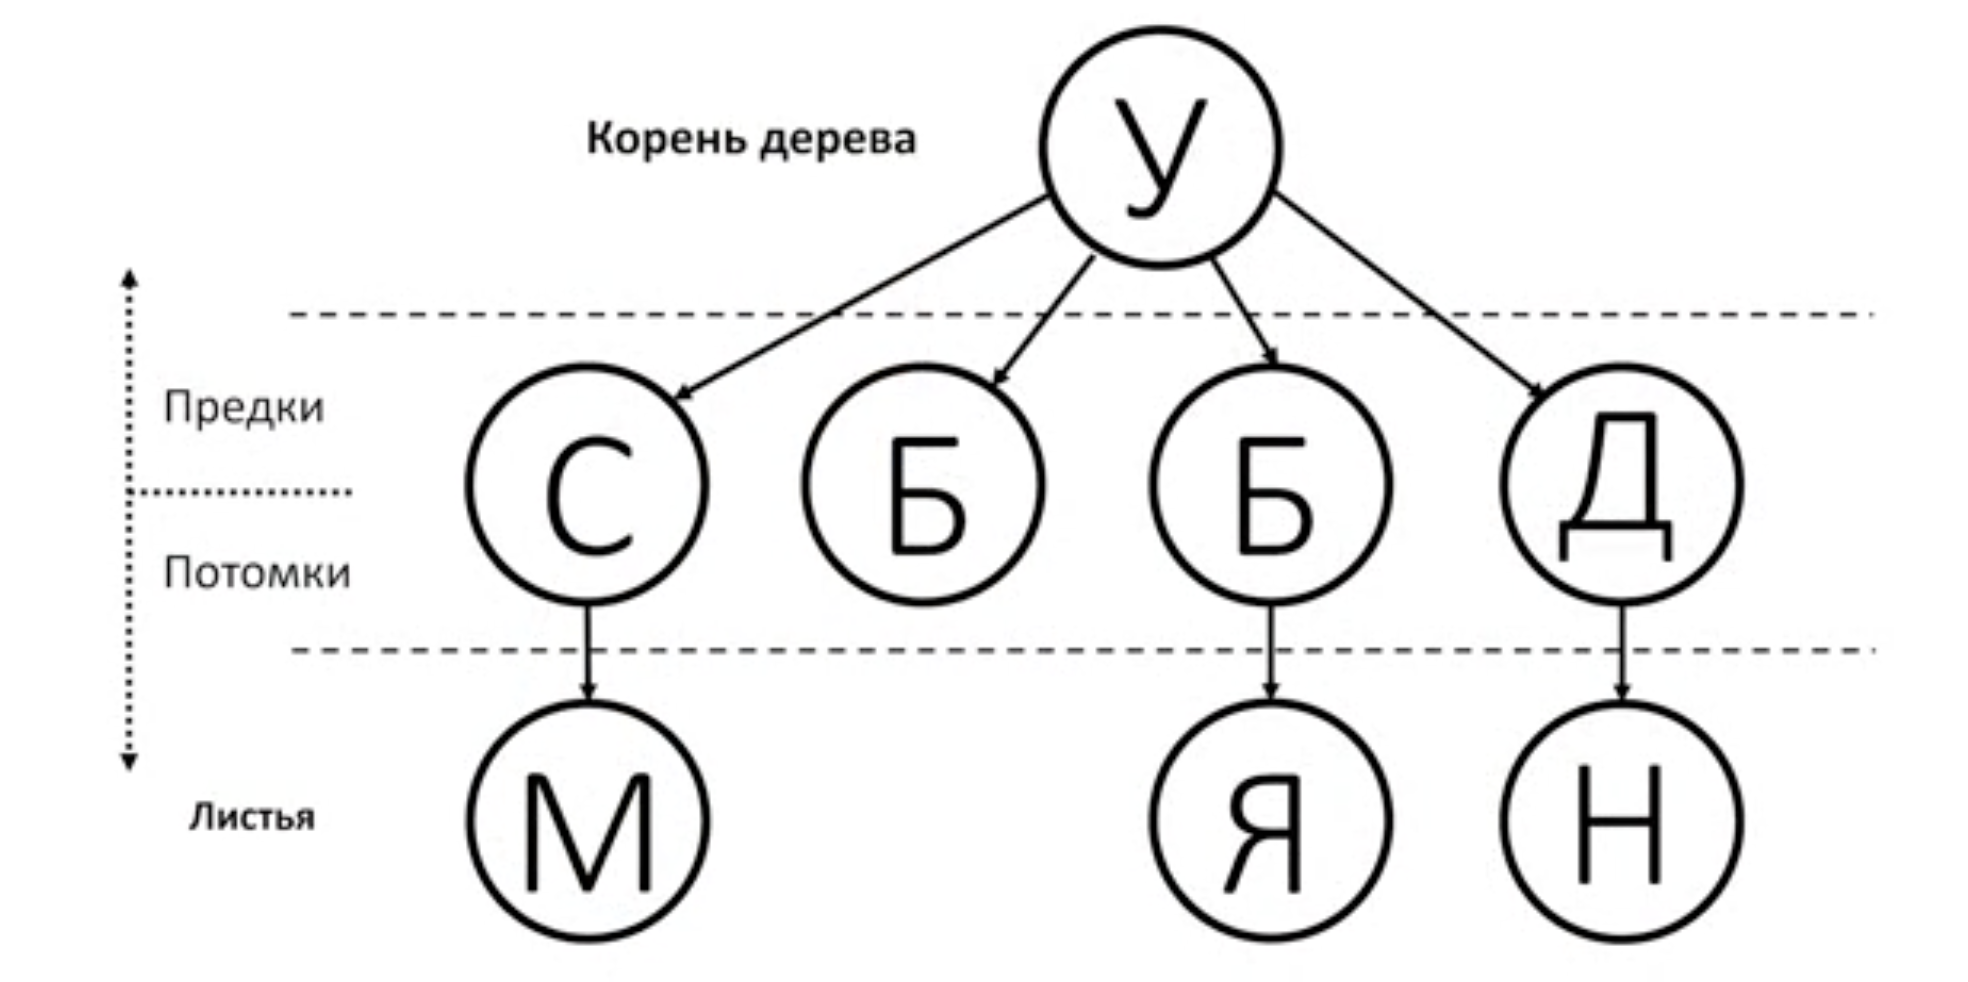

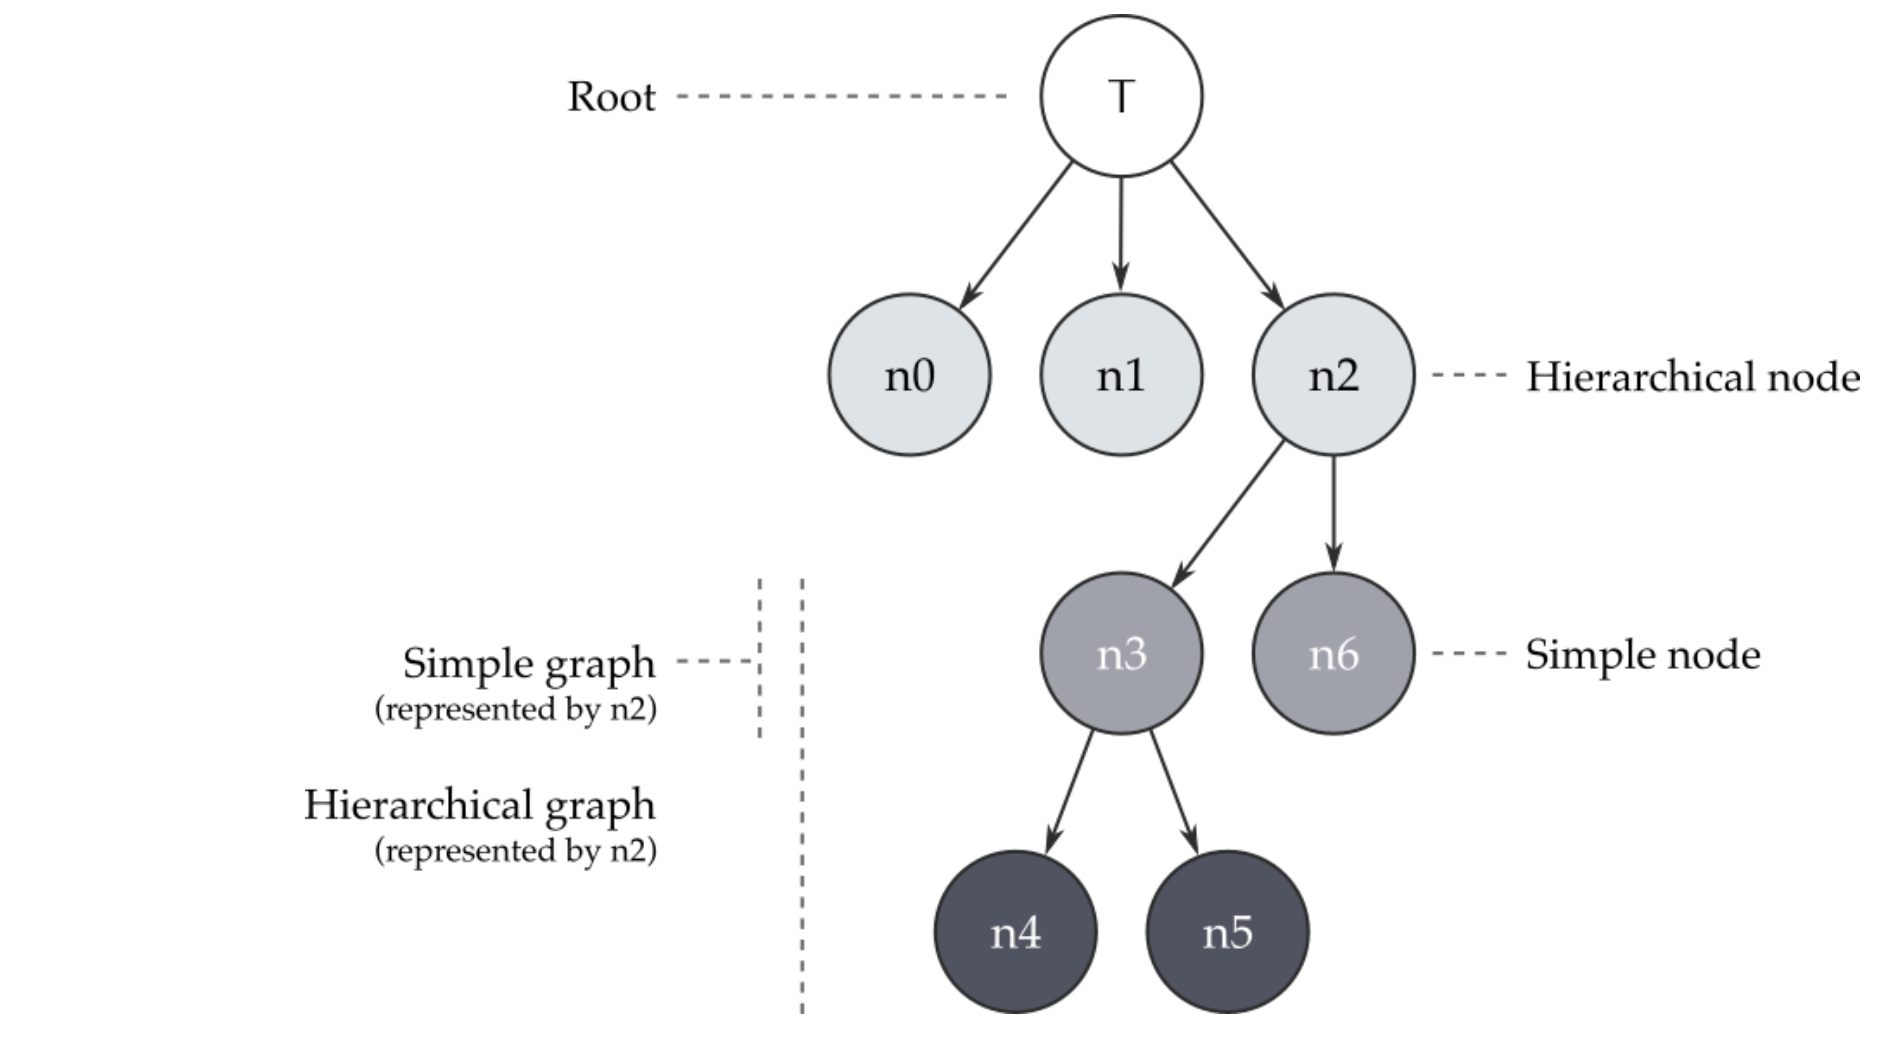

## Способы представления графов в памяти
Представление графов в памяти – это способ хранения информации о ребрах графа, позволяющий решать следующие задачи:
1) Для двух данных вершин $u$ и $b$ проверить, соединены ли вершины $u$ и $v$ ребром.
2) Перебрать все ребра, исходящие из данной вершины  $u$.

При этом способ хранения графов в памяти должен учитывать возможности работы с ориентированными и неориентированными графами. По умолчанию будем предполагать, что хранимый граф является простым, но можно рассмотреть вопрос и о представлении графов с петлями и кратными ребрами.

Рассмотрим следующий граф:

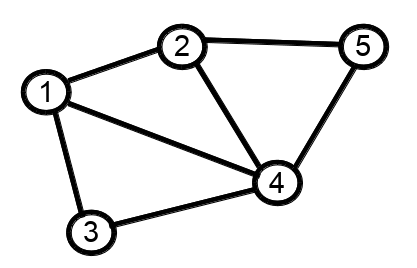

При представлении графа **матрицей смежности** информация о ребрах графа хранится в квадратной матрице (двумерном списке), где элемент A[i][j] равен 1 (или равны весу ребра, если это взвешенный граф), если ребра i и j соединены ребром и равен 0 в противном случае. Для данного примера матрица смежности будет выглядеть так:

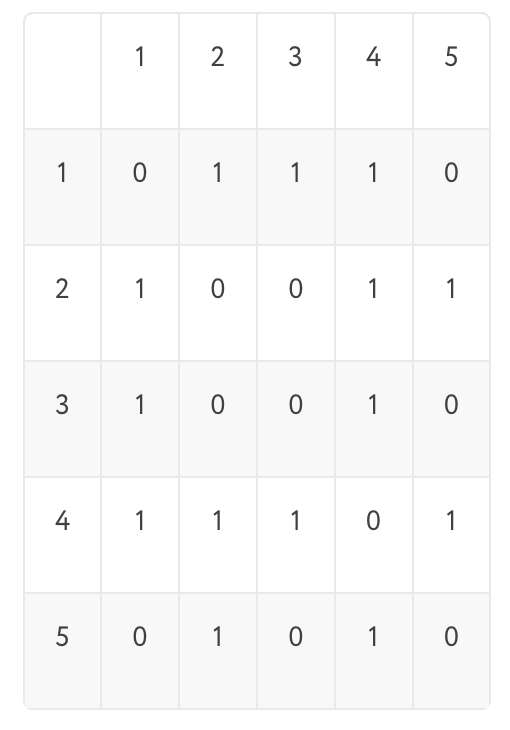

Если граф неориентированный, то матрица смежности всегда симметрична относительно главной диагонали.
При использовании матрицы смежности удобно проверять соединены ли две вершины ребром – это просмотр одного элемента матрицы A[i][j], но сложнее перебирать все ребра, исходящие из данной вершины (для этого необходимо перебрать все оставшиеся вершины и проверить, соединены ли они ребром). Также матрица смежности требует $O(n^2)$  памяти и может оказаться неэффективным способом хранения дерева.

При представлении графа **списками смежности** для каждой вершины i хранится список W[i] смежных с ней вершин. Для рассмотренного примера списки будут такими:

```Py
# Списки смежных вершин
W[1] = [2, 3, 4] # Для вершины 1 смежными вершинами являются 2, 3, 4
W[2] = [1, 4, 5]
W[3] = [1, 4]
W[4] = [1, 2, 3, 5]
W[5] = [2, 4]
```

Таким образом, весь граф можно представить одним списком, состоящим из вложенных списков смежности вершин.
```Py
W = [[], [2, 3, 4], [1, 4, 5], [1, 4], [1, 2, 3, 5], [2, 4]]
```

Поскольку нумерация в нашем примере начинается с 0, то к списку добавлен еще один фиктивный элемент W[0].

В таком способе удобно перебирать ребра, выходящие из вершины i (это просто список W[i]), но сложно проверять наличие ребра между вершинами i и j – для этого необходимо проверить, содержится ли число j в списке W[i]. Но в языке Python можно эту часть сделать более эффективной, если заменить списки на множества – тогда проверка существования ребра между двумя вершинами также будет выполняться за $O(1)$. 

При помощи матриц смежности и списков смежности можно представлять и неориентированные графы. В случае матрицы смежности A[i][j] будет равно 1, если есть ребро, начинающееся в вершине i и заканчивающееся в вершине j. В случае списков смежности наличие ребра из вершины i в вершину j означает, что в списке W[i] есть число j.

Например, для такого графа:

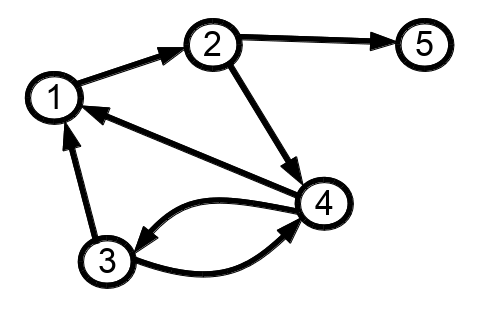

Матрица смежностей будет следующей:

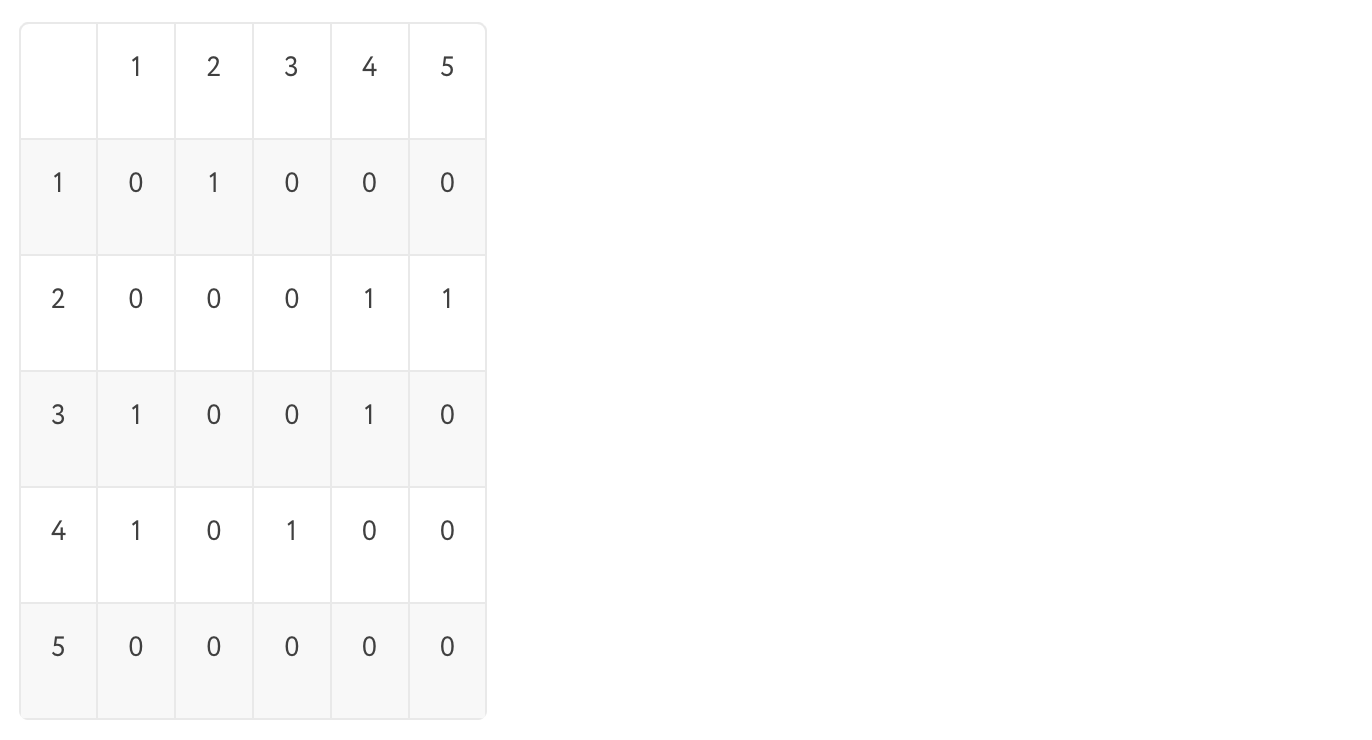

А списки смежности будут следующими:
```Py
W[1] = [2]
W[2] = [4, 5]
W[3] = [1, 4]
W[4] = [1, 3]
W[5] = []
```

Приведем код считывания графа. Будем считать, что граф задается следующим образом: в первой строке записано число вершин n и число ребер m графа. Далее записаны m строк, содержащих по два числа – номера начальной и конечной вершины ребра. Например, первый граф из первого примера можно задать так:
```
5 7 # Вершин 5 Ребер 7
1 2 # номера начальной и конечной вершины ребра
2 5
5 4
4 2
1 4
1 3
3 4
```
Пример заполнения матрицы смежности. Матрица создается размером  $(n+1)*(n+1)$, так как используется нумерация с единицы:

In [9]:
import pprint

n, m = map(int, input().split())
A = [[0] * (n + 1) for i in range(n + 1)]
for i in range(m):
    u, v = map(int, input().split())
    A[u][v] = 1
    # A[v][u] = 1

In [10]:
pprint.pprint(A)

[[0, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 1, 0],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0]]


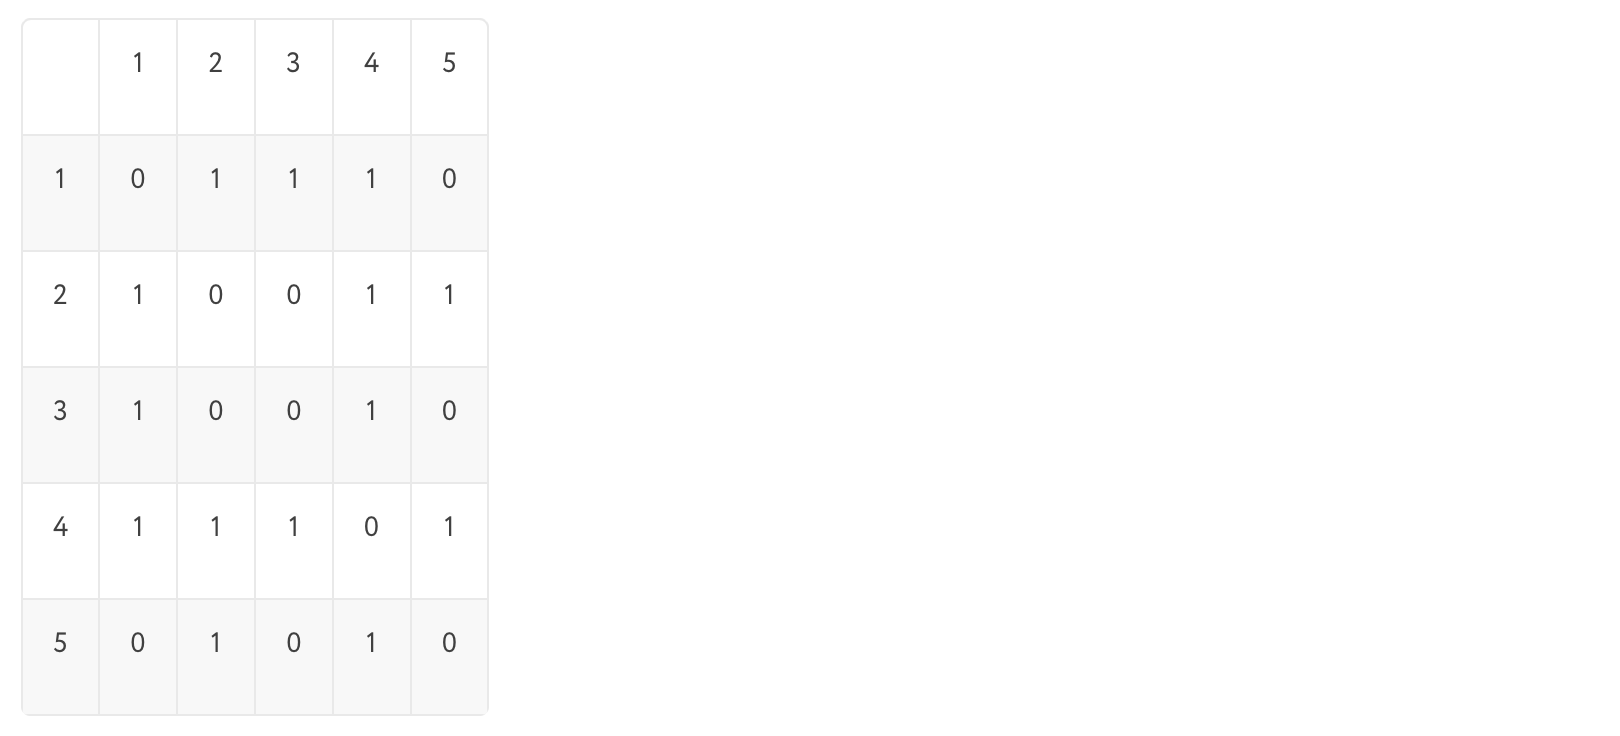

Здесь также используется нумерация с единицы. Во всех примерах закомментированная строчка нужна в случае неориентированного графа, тогда для каждого считанного ребра из $u$ в $v$ необходимо добавить обратное ребро из $v$ в $u$ .

Отступление про pprint: Data pretty printer

Модуль **pprint** позволяет красиво отображать объекты Python. При этом сохраняется структура объекта и отображение, которое выводит pprint, можно использовать для создания объекта. Модуль pprint входит в стандартную библиотеку Python.

Самый простой вариант использования модуля - функция pprint. 

https://docs.python.org/3/library/pprint.html


Пример заполнения списков смежности, используются множества вместо списков:
```Py
n, m = map(int, input().split())
W = [set() for i in range(n + 1)]
for i in range(m):
    u, v = map(int, input().split())
    W[u].add(v)
    # W[v].add(u)
```

И третье - **список ребер**
```
[1,2] # Ребро из вершины 1 в вершину 2
[1,3]
[1,4]
[2,5]
[4,5]
[2,4]
[3,4]
```

## Взвешенные графы

Очень часто рассматриваются графы, в которых каждому ребру приписана некоторая числовая характеристика – **вес**. Вес может означать длину дороги или стоимость проезда по данному маршруту. Соответствующие графы называются взвешенными.
При представлении графа матрицей смежности вес ребра можно хранить в матрице, то есть A[i][j] в данном случае будет равно весу ребра из i в j. При этом при отсутствии ребра можно хранить специальное значение, например, None. Во многих задачах удобно при отсутствии ребра хранить очень большое число, в этом случае отсутствие ребра аналогично наличию ребра очень большой стоимости.
При представлении графа списками смежности можно поступить двумя способами. Можно в списках смежности хранить пару (кортеж) из двух элементов – номер конечной вершины и вес ребра. Но в этом случае неудобно проверять наличие ребра между двумя вершинами.
Другой способ – хранить списки смежности как ранее, а веса ребер хранить в отдельном ассоциативном массиве (map в C++, dict в Python), в котором ключом будет пара из двух номеров вершин (номер начальной и конечной вершины), а значением будет вес ребра между этими вершинами.


```Py
###

graph = [
        [0, 5, 9, 0, 0],
        [0, 0, 0, 2, 7],
        [0, 0, 0, 3, 0],
        [1, 0, 0, 0, 13],
        [0, 0, 0, 0, 0]
    ]
```

```Py
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['D'],
    'D': ['E', 'A'],
    'E': [],
}

###
```

Существует множество алгоритмов для работы с графами (Поиск в глубину depth-first search, DFS. Поиск в ширину Breadth-First Search, BFS. Дейкстры. Флойда. И т.д.).

Давайте рассмотрим Алгоритм поиска в ширину (BFS) и Алгоритм Дейкстры. Для этого нам поможет книга Grokking Algorithms.


Программы из этой книги доступны на:

https://github.com/egonschiele/grokking_algorithms

# BFS Алгоритм поиска в ширину
(BFS, Breadth-First Search)

Поиск в ширину позволяет найти кратчайшее расстояние между двумя объектами.

Из книги:

In [1]:
from collections import deque # list-like container with fast appends and pops on either end

def person_is_seller(name):
    return name[-1] == 'm'  # person является продавцом, если его последняя буква равна 'm'

graph = dict()
graph["you"] = ["alice", "bob", "claire"]
graph["bob"] = ["anuj", "peggy"]
graph["alice"] = ["peggy"]
graph["claire"] = ["thom", "jonny"]
graph["anuj"] = []
graph["peggy"] = []
graph["thom"] = []
graph["jonny"] = []


def search(name):
    search_queue = deque()
    search_queue += [name] # добавляем вершину 'you' (start_node) в очередь
    searched = set()# множество посещенных людей
    while search_queue: # пока в очереди есть элементы
        person = search_queue.popleft() # методом получаем самый левый элемент очереди и удаляем его
        # Человек проверяется только в том случае, если он не проверялся ранее.
        if person in searched:
            continue
        if person_is_seller(person): # Если
            print(person + " is a mango seller!")
            return True
        search_queue += graph[person] # добавляем в очередь связанные с вершиной person вершины
        searched.add(person) # добавляем вершину в посещенные
    return False

# определить, существует ли путь между вершиной you (start_node) и продавцом (stop_node)
search("you")

thom is a mango seller!


True

Более доработанный алгоритм:

In [ ]:
# Breadth-First Search
# Алгоритм поиска в ширину

from collections import deque

# graph = {'A': ['M', 'P'],
#          'M': ['A', 'N'],
#          'N': ['M', 'B'],
#          'P': ['A', 'B'],
#          'B': ['P', 'N']}


graph = {}
graph["you"] = ["alice", "bob", "claire"]
graph["bob"] = ["anuj", "peggy"]
graph["alice"] = ["peggy"]
graph["claire"] = ["thom", "jonny"]
graph["anuj"] = []
graph["peggy"] = []
graph["thom"] = []
graph["jonny"] = []

def bfs(start, goal, graph):
    queue = deque([start])
    visited = {start: None} # node : parent

    while queue:
        cur_node = queue.popleft()
        if cur_node == goal:
            break

        next_nodes = graph[cur_node]
        for next_node in next_nodes:
            if next_node not in visited:
                queue.append(next_node)
                visited[next_node] = cur_node
    return visited


start = 'you'
goal = 'thom'
visited = bfs(start, goal, graph)
print(visited)
cur_node = goal
print(f'\n path from {goal} to {start}: \n {goal} ', end='')
while cur_node != start:
    cur_node = visited[cur_node]
    print(f'---> {cur_node} ', end='')

# Алгоритм Дейкстры

Из книги:

In [2]:
# the graph. граф
import pprint

graph = dict()
graph["start"] = dict()
graph["start"]["a"] = 6
graph["start"]["b"] = 2

graph["a"] = dict()
graph["a"]["fin"] = 1

graph["b"] = dict()
graph["b"]["a"] = 3
graph["b"]["fin"] = 5

graph["fin"] = dict()

# the costs table. стоимости/веса
infinity = float("inf")
costs = dict()
costs["a"] = 6  # Стоимость от начального узла к узлу "a"
costs["b"] = 2  # Стоимость от начального узла к узлу "b"
costs["fin"] = infinity  # Стоимость ставим пока inf

# the parents table. родители
parents = dict()
parents["a"] = "start" # для вершины 'a' родитель 'start'
parents["b"] = "start" # для вершины 'b' родитель 'start'
parents["fin"] = None # для вершины 'fin' родитель пока None

processed = list()  # visited nodes

def find_lowest_cost_node(costs: dict) -> str:
    # Начальные значения в бесконечность и None
    lowest_cost = float("inf")
    lowest_cost_node = None
    # Go through each node.
    for node in costs: # Проходимся по ключам словаря costs
        cost = costs[node] # По ключу получаем стоимость до вершины node
        # Если это самая низкая стоимость на данный момент и она еще не обработана...
        if cost < lowest_cost and node not in processed: # inf < inf - False. inf == inf - True
            # ... установить его в качестве нового узла с наименьшими затратами.
            lowest_cost = cost
            lowest_cost_node = node
    # Таким образом мы вернем вершину с наименьшими затратами
    return lowest_cost_node

# Найдите самый недорогой узел, который вы еще не обрабатывали.
node: str = find_lowest_cost_node(costs)
# Если вы обработали все узлы, цикл while завершается.
while node is not None: # node срановится None, когда посетили все вершины
    cost = costs[node] # По ключу получаем стоимость до вершины node
    # Переберите всех соседей этого узла.
    neighbors = graph[node] # в словаре grapth по ключу получаем соседей вершина : вес ребра из node в эту вершину
    for n in neighbors.keys(): # для каждой вершины ...
        # рассчитываем новую стоимость через текущий узел
        new_cost = cost + neighbors[n] # стоимость вершины node + стоимость ребра до вершины n.
        # Если к соседу n можно быстрее добраться через текущий узел node...
        if costs[n] > new_cost:
            # ... обновить стоимость для этого узла n.
            costs[n] = new_cost
            # Этот узел node становится новым родителем для этого соседа.
            parents[n] = node
    # Пометить узел node как обработанный/посещенный.
    processed.append(node)
    # Найдите следующий узел node для обработки и зациклитесь.
    node = find_lowest_cost_node(costs)


# Cost from the start to each node
print(f' costs are {costs} node : cost_to_this_node')
print(f' parents are {parents} node : parent')

goal = 'fin'
cur_node = goal
print(f'\n path from {goal} to start: \n {goal} ', end='')
while cur_node != 'start':
    cur_node = parents[cur_node]
    print(f'---> {cur_node} ', end='')


 costs are {'a': 5, 'b': 2, 'fin': 6} node : cost_to_this_node
 parents are {'a': 'b', 'b': 'start', 'fin': 'a'} node : parent

 path from fin to start: 
 fin ---> a ---> b ---> start 

Пример из книги находит цену для каждой вершины.
Можно этот алгоритм доработать. Например, вызывать функцию так:
```
dijkstra(start, goal, graph)
```
И через это условие прерывать поиск:
```
if cur_node == goal:
            break
```

Как можно представить граф в ооп:

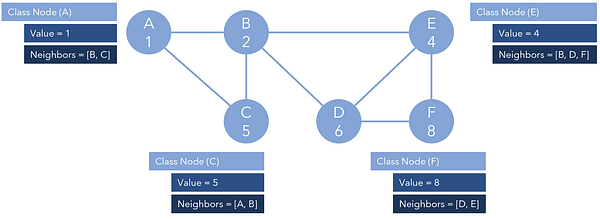

Представление бинарного дерева:
```Py
class Tree:
	def __init__(self, left, right):
		self.left = left
		self.right = right
>>> t = Tree(Tree("a", "b"), Tree("c", "d"))
>>> t.right.left
```